In [1]:
from DysRegNet_package.src.dysregnet import dysregnet
import pandas as pd
import pickle

Get data

In [2]:
meta = pd.read_csv("exercise_data/LUAD_meta.csv")
expr = pd.read_csv("exercise_data/LUAD_expression.csv")
grn=pd.read_csv("exercise_data/regulatory_network.csv", sep = ",")

In [3]:
expr

,sample,TCGA-38-4625-11,TCGA-44-6145-11,TCGA-50-5930-11,TCGA-49-4490-11,TCGA-55-6970-11,TCGA-44-6148-11,TCGA-50-5933-11,TCGA-44-6144-11,TCGA-44-3398-11,...,TCGA-MP-A4T9-01,TCGA-05-4405-01,TCGA-78-7149-01,TCGA-71-6725-01,TCGA-97-A4M0-01,TCGA-91-6828-01,TCGA-J2-A4AE-01,TCGA-44-6777-01,TCGA-44-2656-01,TCGA-05-4250-01
0,LINC00115,-0.323490,0.164617,-0.177936,-0.590117,0.140063,0.140063,0.609560,0.321635,0.257243,...,1.098587,1.462368,0.114943,1.058961,1.771097,1.534615,1.300609,-0.755130,0.713843,0.382206
1,C1orf159,-1.100032,0.191524,-0.317288,-2.212051,-0.588814,0.430290,-0.629904,0.275370,0.215771,...,1.439399,1.595244,0.571513,2.294883,4.361225,0.690341,2.344302,-1.160001,-1.602574,0.669981
2,TNFRSF4,-0.915524,-0.435535,-1.316217,-0.891135,0.696697,-0.249745,-0.171599,0.049561,0.655325,...,2.336116,-0.034715,1.239382,-1.246370,1.623220,-0.107243,0.044709,1.284584,-1.797955,-0.155254
3,UBE2J2,-0.688171,0.227018,-0.938959,-0.450484,0.196450,-0.041238,0.730466,0.006799,0.165881,...,3.043706,0.361146,2.383671,5.874742,3.104219,-1.270848,-0.239622,-1.385637,-5.165596,-0.724978
4,DVL1,-0.777079,0.436352,-0.087719,-3.015575,-0.068389,0.265344,0.252326,0.795135,0.466727,...,0.719394,0.234968,3.551785,2.767947,1.474041,-0.389893,0.335364,-0.699366,-2.421455,0.059620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9408,G6PD,0.364662,-0.378749,0.140855,-2.432705,0.130703,-0.206624,0.758980,1.015320,0.529173,...,1.021781,0.668303,3.090734,0.688376,-0.224391,2.415158,-2.123527,-0.464580,0.294845,-0.626322
9409,GAB3,-1.261048,-0.287446,0.734071,-2.679173,1.488432,0.522882,0.240626,0.522882,0.633409,...,0.010916,-1.863007,-5.942633,-5.051171,0.099297,0.191906,-0.064581,-0.610974,-0.821852,-3.355219
9410,DKC1,-2.002651,1.244888,0.518765,-1.368930,0.932143,0.896604,1.497030,-0.058467,0.300666,...,4.955560,5.592648,-0.314350,4.949575,2.911118,4.737087,1.528828,2.686660,0.968232,4.839964
9411,MTCP1,-0.905306,0.983097,0.561249,0.238530,0.865795,0.481395,-1.243721,-1.370110,1.329222,...,2.146484,-0.829858,0.430454,2.199077,-0.700991,-0.023611,2.712344,1.689941,-0.825182,-1.212606


In [4]:
meta

,sample,_PATIENT,cancer type abbreviation,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,clinical_stage,histological_type,histological_grade,...,DSS.time,DFI,DFI.time,PFI,PFI.time,Redaction,sample_type_id,sample_type,_primary_disease,condition
0,TCGA-38-4625-11,TCGA-38-4625,LUAD,66.0,FEMALE,WHITE,Stage IB,NaN,Lung Adenocarcinoma,NaN,...,2973.0,0.0,2973.0,0.0,2973.0,NaN,11.0,Solid Tissue Normal,lung adenocarcinoma,0
1,TCGA-44-6145-11,TCGA-44-6145,LUAD,62.0,FEMALE,WHITE,Stage IA,NaN,Lung Adenocarcinoma,NaN,...,595.0,0.0,595.0,0.0,595.0,NaN,11.0,Solid Tissue Normal,lung adenocarcinoma,0
2,TCGA-50-5930-11,TCGA-50-5930,LUAD,47.0,MALE,WHITE,Stage IIIA,NaN,Lung Adenocarcinoma,NaN,...,282.0,NaN,NaN,1.0,177.0,NaN,11.0,Solid Tissue Normal,lung adenocarcinoma,0
3,TCGA-49-4490-11,TCGA-49-4490,LUAD,45.0,FEMALE,WHITE,Stage IIIA,NaN,Lung Adenocarcinoma,NaN,...,385.0,NaN,NaN,1.0,385.0,NaN,11.0,Solid Tissue Normal,lung adenocarcinoma,0
4,TCGA-55-6970-11,TCGA-55-6970,LUAD,67.0,FEMALE,WHITE,Stage IIIA,NaN,Lung Adenocarcinoma,NaN,...,464.0,NaN,NaN,1.0,457.0,NaN,11.0,Solid Tissue Normal,lung adenocarcinoma,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,TCGA-91-6828-01,TCGA-91-6828,LUAD,70.0,MALE,WHITE,Stage IA,NaN,Lung Adenocarcinoma,NaN,...,323.0,0.0,323.0,0.0,323.0,NaN,1.0,Primary Tumor,lung adenocarcinoma,1
105,TCGA-J2-A4AE-01,TCGA-J2-A4AE,LUAD,77.0,FEMALE,WHITE,Stage IA,NaN,Lung Adenocarcinoma,NaN,...,1079.0,0.0,1079.0,0.0,1079.0,NaN,1.0,Primary Tumor,lung adenocarcinoma,1
106,TCGA-44-6777-01,TCGA-44-6777,LUAD,85.0,FEMALE,WHITE,Stage IB,NaN,Lung Adenocarcinoma,NaN,...,987.0,0.0,987.0,0.0,987.0,NaN,1.0,Primary Tumor,lung adenocarcinoma,1
107,TCGA-44-2656-01,TCGA-44-2656,LUAD,59.0,MALE,WHITE,Stage IB,NaN,Lung Adenocarcinoma,NaN,...,1429.0,0.0,1429.0,1.0,568.0,NaN,1.0,Primary Tumor,lung adenocarcinoma,1


How many case and control samples are included in the data set? 

In [5]:
meta.value_counts("condition")

condition
0    59
1    50
Name: count, dtype: int64

In [6]:
grn

,SYMBOL_TF,SYMBOL_TG
0,PARP1,BRCA2
1,AHR,CYP1B1
2,AHR,FOS
3,AHR,SOS1
4,AHR,UGT1A6
...,...,...
14974,ZNF653,CDKN2A
14975,E2F7,SP1
14976,ZNF417,CDKN2A
14977,ZNF384,CDKN2A


Define the confounding variables or the design matrix

In [7]:
# define condition column (0 indicated control, 1 indicates case), Column name for the condition in the meta DataFrame.
conCol='condition'

# define categorical confounder columns in meta dataframe, List of categorical variable names. They should match the name of their columns in the meta Dataframe.
CatCov=['gender']  

# define continuous confounder columns in meta dataframe, List of continuous covariates. They should match the name of their columns in the meta Dataframe.
# ConCov=['gender']

In [8]:
expr = expr.set_index(expr.columns[0])
expr = expr.T 
expr.insert(0, "sample", expr. index)
assert all(expr.iloc[:, 0].values == meta.iloc[:,0].values)

In [9]:
assert all(expr.iloc[:,0].values == meta.iloc[:,0].values), 'mismatch'

Run DysRegNet

14979it [02:06, 118.11it/s]


Average pickle:  0.001611126894562177
Average joblib:  0.0044538120026820505
Average Memory Usage (Pickle): 46.58 KB
Average Memory Usage (Joblib): 48.90 KB
Top 5 edges by pickle memory usage:
1. Edge: ('PARP1', 'BRCA2'), Memory Usage: 50.59 KB
2. Edge: ('FOXP3', 'LARP7'), Memory Usage: 50.53 KB
3. Edge: ('E2F4', 'C1QL1'), Memory Usage: 50.31 KB
4. Edge: ('AR', 'CSGALNACT1'), Memory Usage: 50.16 KB
5. Edge: ('AR', 'SKI'), Memory Usage: 49.94 KB


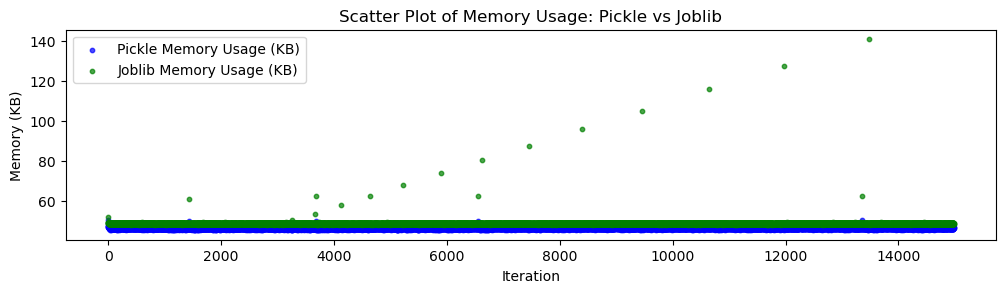

In [10]:
data=dysregnet.run(expression_data=expr,
                   meta=meta, 
                   GRN=grn,
                   conCol=conCol,
                   CatCov=CatCov,
                   direction_condition=False,
                   normaltest=True,
                   R2_threshold=.2)

In [11]:
# Load the pickle file
with open("pickle_models/AHR_FOS.pkl", "rb") as file:
    loaded_model = pickle.load(file)

In [12]:
print("Attributes and methods of the loaded object:")
print(dir(loaded_model))

Attributes and methods of the loaded object:
['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', '_HCCM', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', '_abat_diagonal', '_cache', '_data_attr', '_data_in_cache', '_get_robustcov_results', '_get_wald_nonlinear', '_is_nested', '_transform_predict_exog', '_use_t', '_wexog_singular_values', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 

In [13]:
print("Variables and their values in the loaded object:")
print(vars(loaded_model))

Variables and their values in the loaded object:
{'_results': <statsmodels.regression.linear_model.OLSResults object at 0x16bce3b10>, '__doc__': "\n    Results class for for an OLS model.\n\n    Parameters\n    ----------\n    model : RegressionModel\n        The regression model instance.\n    params : ndarray\n        The estimated parameters.\n    normalized_cov_params : ndarray\n        The normalized covariance parameters.\n    scale : float\n        The estimated scale of the residuals.\n    cov_type : str\n        The covariance estimator used in the results.\n    cov_kwds : dict\n        Additional keywords used in the covariance specification.\n    use_t : bool\n        Flag indicating to use the Student's t in inference.\n    **kwargs\n        Additional keyword arguments used to initialize the results.\n\n    See Also\n    --------\n    RegressionResults\n        Results store for WLS and GLW models.\n\n    Notes\n    -----\n    Most of the methods and attributes are inherit

In [14]:
print(loaded_model.params)  # Coefficients
print(loaded_model.summary())  # Full model summary

const          0.000360
AHR            0.323355
gender_MALE   -0.000850
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     3.268
Date:                Thu, 05 Dec 2024   Prob (F-statistic):             0.0454
Time:                        12:22:09   Log-Likelihood:                -80.461
No. Observations:                  59   AIC:                             166.9
Df Residuals:                      56   BIC:                             173.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [15]:
# get the patient-specific dysregulate networks
# results = data.get_results()

# or with binary edges
results = data.get_results_binary()

# get R2 values, coefficients, and coefficient p-values for all models/edges
# data.get_model_stats()

In [16]:
edge_counts = results.sum()
most_frequent_edge = edge_counts.idxmax()
max_count = edge_counts.max()

print (f"The most frequent edge is {most_frequent_edge} with {max_count} occurrences.")

The most frequent edge is ('AR', 'ADPRH') with 36.0 occurrences.
